In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

# Setting the stock ticker symbol and the time period
ticker_symbol = 'NVDA'  
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Drop any rows with NaN values (if any)
returns = data['Returns'].dropna().values

print(returns)


[*********************100%***********************]  1 of 1 completed

[-1.60056130e-02  4.19355823e-03  1.21064931e-02  1.87562028e-03
  1.09827150e-02  5.34922918e-03  3.13522028e-02 -1.86522352e-02
 -6.91530666e-03  1.36825780e-02  1.40603843e-03 -5.37539569e-03
  8.75201349e-03  1.09951488e-02 -9.41223431e-03 -4.10412004e-02
  3.23480380e-02 -9.79958350e-03  1.09980041e-03 -3.81597163e-02
  1.64953090e-02  2.82943545e-02  1.46886208e-02  1.39176775e-02
 -1.04620722e-02  4.52325634e-02  1.87090258e-02  1.73580255e-02
 -6.45771167e-03  7.02045878e-02  2.33962730e-02  6.11322015e-02
 -1.90657085e-02 -4.73923608e-02 -7.06975121e-02 -4.10933281e-02
  2.13699154e-02 -5.56656096e-02  6.91607441e-02  2.35493354e-02
 -3.81288899e-02  7.00291555e-02 -3.94365452e-02 -2.65284985e-02
 -7.74320495e-02  6.37226223e-02 -5.59600829e-02 -1.22367710e-01
  1.13401899e-01 -1.84520877e-01  1.06262842e-01 -6.65071419e-02
  5.00442608e-02 -3.39013943e-02  3.37302966e-02  1.71564163e-01
 -1.42866843e-02  4.73086121e-02 -1.75319831e-02  5.08841458e-02
 -7.49267622e-03 -7.78832

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
import yfinance as yf

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -231.265
Distribution:                  Normal   AIC:                           470.529
Method:            Maximum Likelihood   BIC:                           489.036
                                        No. Observations:                  755
Date:                Fri, Oct 18 2024   Df Residuals:                      754
Time:                        02:49:12   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0239  1.072e-02      2.232  2.562e-02 [2.

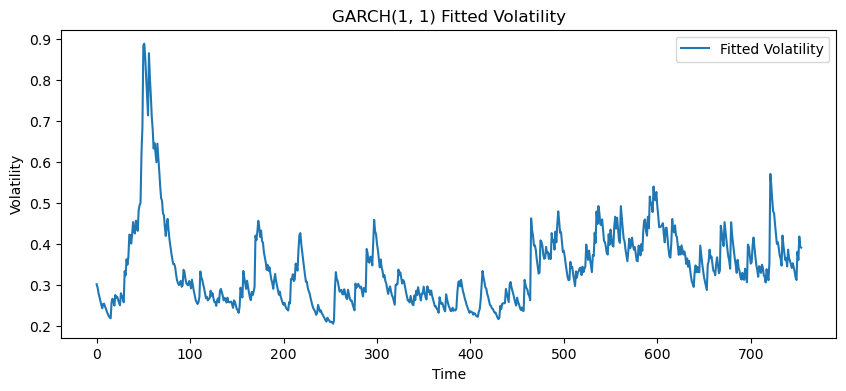

In [29]:
# Scale the returns
scaled_returns = returns * 10  # Rescale the returns

# Fitting a GARCH(1, 1) model
model = arch_model(scaled_returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')  # 'disp' controls output during fitting

# Print model summary
print(model_fit.summary())

# Forecast volatility
forecast = model_fit.forecast(horizon=5) #setting the horizon is very important in this case for the next five days in future 
print("Forecasted volatilities:")
print(forecast.variance.values[-1, :])  # Print last forecasted variances

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(model_fit.conditional_volatility, label='Fitted Volatility')
plt.title('GARCH(1, 1) Fitted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -231.265
Distribution:                  Normal   AIC:                           470.529
Method:            Maximum Likelihood   BIC:                           489.036
                                        No. Observations:                  755
Date:                Fri, Oct 18 2024   Df Residuals:                      754
Time:                        02:49:29   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0239  1.072e-02      2.232  2.562e-02 [2.

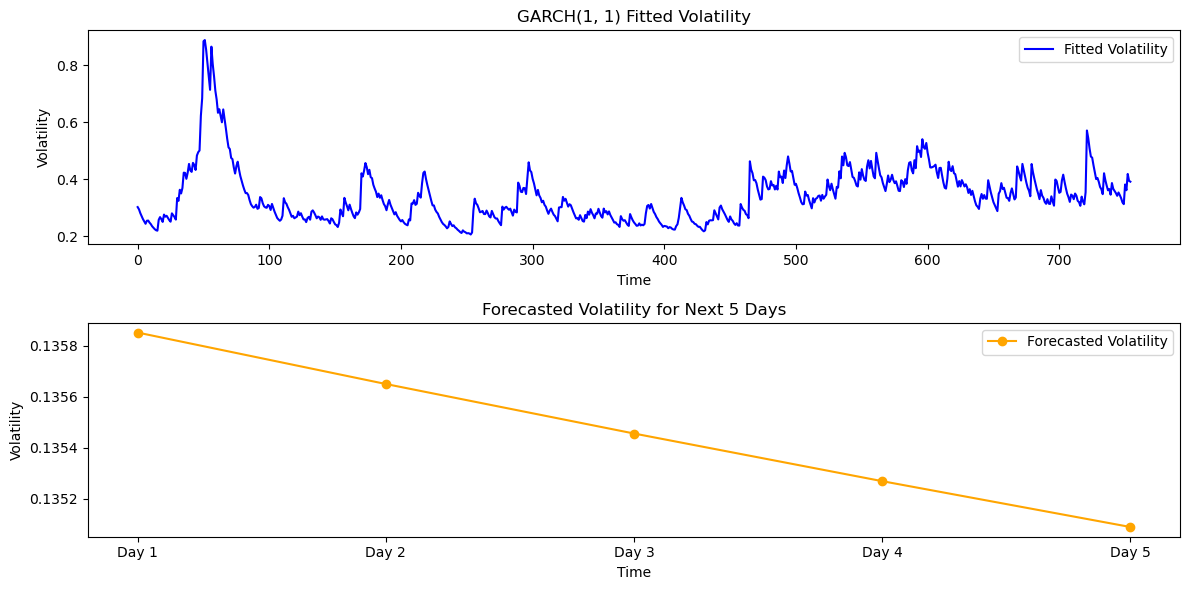

In [31]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Setting the stock ticker symbol and the time period
ticker_symbol = 'NVDA'  
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Drop any rows with NaN values (if any)
returns = data['Returns'].dropna().values

# Scale the returns
scaled_returns = returns * 10  # Rescale the returns

# Fit a GARCH(1, 1) model
model = arch_model(scaled_returns, vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')  # 'disp' controls output during fitting

# Print model summary
print(model_fit.summary())

# Forecast volatility
forecast_horizon = 5  # Forecasting the next 5 periods
forecast = model_fit.forecast(horizon=forecast_horizon)

# Print forecasted volatilities
print("Forecasted volatilities:")
print(forecast.variance.values[-1, :])  # Print last forecasted variances

# Plot the fitted volatility and forecasted volatility
plt.figure(figsize=(12, 6))

# Plot fitted volatility
plt.subplot(2, 1, 1)
plt.plot(model_fit.conditional_volatility, label='Fitted Volatility', color='blue')
plt.title('GARCH(1, 1) Fitted Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Plot forecasted volatility
plt.subplot(2, 1, 2)
plt.plot(range(len(model_fit.conditional_volatility), len(model_fit.conditional_volatility) + forecast_horizon), 
         forecast.variance.values[-1, :], label='Forecasted Volatility', color='orange', marker='o')
plt.title('Forecasted Volatility for Next 5 Days')
plt.xlabel('Time')
plt.ylabel('Volatility')

# Set custom x-ticks for forecast days
plt.xticks(ticks=range(len(model_fit.conditional_volatility), len(model_fit.conditional_volatility) + forecast_horizon),
           labels=[f'Day {i+1}' for i in range(forecast_horizon)])  
plt.legend()

plt.tight_layout()
plt.show()
